## Part 1. Gaussian quadrature

The Gaussian quadrature method is one of the methods of numerical integration that allows you to increase the accuracy of integration, by using orthogonal polynomials and their roots as nodes.

$$
\int_a^b \!  w(x)\, f(x)\, dx \approx \sum_{k=1}^n w_k \, f(x_k) \;,
$$

here $\omega$ is the weight function, this weight function determines the basis of orthogonal polynomials whose roots are used as integration nodes. If the function $f(x)$ is a polynomial, then such an integration method gives *exact* value for the integral.

For example, let's calculate the following integral:
$$
\int_{-1}^1 (7x^3 - 8 x^2 - 3 x + 3) dx  \label{eq1}\tag{1}
$$

Here function is already polynomial, so we put the weight function $\omega(x) = 1$. Then the calculation of the integral reduces to the sum in the polynomials roots witch corresponding to the weight function $\omega(x) = 1$. For example, here https://dlmf.nist.gov/18.3 you may see which basis of polynomials corresponds to your weight function.

You may see, that Legendre polynomials correspond to our weight function. Now go to the documentation https://docs.scipy.org/doc/scipy/reference/special.html#orthogonal-polynomials. Here, the function *roots_legendre* immediately gives you the roots of the Legendre polynomial and weight at this roots (for Legendre polynomials all these weight are ones).


### Task 1.1
(20% of the grade)

1. Calculate the exact value of the integral ([1](#mjx-eqn-eq1)) using a pen and paper (or in your mind). Remember it, then you will compare numerical results with it.

In [303]:
Integral = 2/3
print(Integral)

0.6666666666666666


2. Calculate the value of the integral ([1](#mjx-eqn-eq1)) using the usual method of numerical integration on a uniform grid (for example, implemented by you in week_6_calculus homework). Estimate the number of nodes needed to achieve relative accuracy $10^{-10}$.

In [304]:
import numpy as np

In [305]:
def midpoint_rule(func, a, b, eps):
    
    I = float('inf')
    i = 0
    N = 2
    
    while i == 0:
        
        hk = (b-a)/N
        xk = np.linspace(a + hk/2, b - hk/2, N) #берем середины интервалов
        Qk = [func(k) for k in xk]
        Q = np.sum(Qk)*hk
        
        if (abs(I-Q)<eps):
            break
            
        N *= 2
        I = Q
        
    return Q, N

In [306]:
func = lambda x: 7*x**3 - 8*x**2 - 3*x + 3
I, N = midpoint_rule(func, -1, 1, 1e-10)
print("I =", I, ", the number of nodes:", N+1) #N - количество интервалов, узлов на один больше))) 

I = 0.6666666666860692 , the number of nodes: 524289


3. Calculate the integral ([1](#mjx-eqn-eq1)) using the roots of the Legendre polynomial from 1 to 6 degrees as nodes (to get roots and weigths use scipy.special.roots_legendre)

In [307]:
from scipy.special import roots_legendre

In [308]:
def legendre_nodes_method(n, func): #n - степень полинома Лежандра
    
    x, w = roots_legendre(n)
    
    return np.sum(func(x)*w)

In [309]:
for i in range(1,7):
    print("I =", legendre_nodes_method(i, func), ", the number of nodes:", i)

I = 6.0 , the number of nodes: 1
I = 0.6666666666666674 , the number of nodes: 2
I = 0.6666666666666639 , the number of nodes: 3
I = 0.6666666666666667 , the number of nodes: 4
I = 0.6666666666666685 , the number of nodes: 5
I = 0.6666666666666695 , the number of nodes: 6


Compare the number of nodes needed to obtain the same accuracy in both numerical methods.

Методу, использующему корни полинома Лежандра, потребовалось гораздо меньше узлов для достижения той же высокой точности. Снова правильным выбором сетки быстрее посчитали интеграл.

### Task 1.2
(20% of the grade)

Calculate the value of the same integral, but on the interval from 0 to 10.
$$
\int_{0}^{10} (7x^3 - 8 x^2 - 3 x + 3) dx 
$$

Please note that you can no longer directly use Legendre polynomials, because they are defined for the interval (-1,1). But you can always make an *affine transformation* (a transformation that does not change the area) in order to go to the desired coordinate system.

Сожмем отрезок интегрирования в 5 раз (у итогового длина 2) и сдвинем на единичку влево$~-$ сделаем замену $x = 5(y+1)$:

$$
\int_{0}^{10} (7x^3 - 8 x^2 - 3 x + 3) dx = \int_{-1}^{1} (7\cdot5^3(y+1)^3 - 8\cdot5^2 (y+1)^2 - 3\cdot5 (y+1) + 3)\cdot 5dy
$$

In [310]:
a_func = lambda x: 5*(7*125*(x+1)**3 - 8*25*(x+1)**2 - 15*(x+1) + 3) #Ибо считать чиселки - удел компьютера

In [311]:
for i in range(1,7):
    print("I =", legendre_nodes_method(i, a_func), ", the number of nodes:", i)

I = 6630.0 , the number of nodes: 1
I = 14713.333333333332 , the number of nodes: 2
I = 14713.333333333336 , the number of nodes: 3
I = 14713.333333333332 , the number of nodes: 4
I = 14713.333333333328 , the number of nodes: 5
I = 14713.33333333333 , the number of nodes: 6


Compare the result with the exact value of the integral.

In [312]:
Integral = 44140/3
print(Integral)

14713.333333333334


Посмотрим как близко вычисление интеграла с двумя узлами:

In [313]:
Integral - legendre_nodes_method(2, a_func)

1.8189894035458565e-12

Уже большая точность!

### Task 1.3
(20% of the grade)

Calculate the value of the following integral:
$$
\int_{0}^{2\pi} \frac{cos(x) dx }{\sqrt{4\pi^2 - x^2}}
$$
by using the corresponding basis of orthogonal polynomials. 
Find the degree of the polynomial (number of nodes) at which the accuracy of the integral starts to exceed the double floating point accuracy.

Подозрение на "Chebyshev of first kind" с весом $\omega (x) = \frac1{\sqrt{1 - x^2}}$ и интервалом (-1, 1), но нужно сделать замену переменной $x = 2\pi y$:

$$
\int_{0}^{2\pi} \frac{cos(x) dx }{\sqrt{4\pi^2 - x^2}} = \int_{0}^{1} \frac{cos(2\pi y) dy }{\sqrt{1 - y^2}}=  \int_{-1}^{1} \frac{cos(2\pi y) dy }{2\sqrt{1 - y^2}},
$$

где последнее равенство верно в силу чётности подынтегральной функии.

In [314]:
from scipy.special import roots_chebyt

In [315]:
def chebyt_nodes_method(n, func): #n - степень полинома Лежандра
    
    x, w = roots_chebyt(n)
    
    return np.sum(func(x)*w)

In [316]:
f = lambda x: np.cos(2*np.pi*x)/2

Считаем, что достигнута требуемая точность, когда с увеличением степени полинома система перестает различать соответствующие им посчитанные интегралы. Найдем оптимальную степень полинома и приближенное значение интеграла:

In [317]:
I = float('inf')
n = 1

while 0 == 0:
    
    i = chebyt_nodes_method(n, f)
    if I-i == 0:
        break
    I = i
    n +=1
    
print("I =", I, ", the number of nodes:", n-1)

I = 0.34601015881226443 , the number of nodes: 16


## Part 2. Fredholm equation

There are two types of Fredholm equations. 

1. Fredholm equation of the first kind:
$$
\int_a^b \! K(x, t)\, \color{blue}{f(t)} \,dt = g(x)
$$

2. Fredholm equation of the second kind:
$$
\lambda \int_a^b\! K(x, t)\, \color{blue}{f(t)} \, dt + g(x) = \color{blue}{f(x)}
$$

Here higtlighted function $f(x)$ is unknown, kernel function $K(x, t)$ and given function $g(x)$, $\lambda$ is a real number. Numerically, Fredholm equations of the first kind are very ill-conditioned. We will consider equations of the second kind only.

The basic idea is to approximate the integral by some quadrature formula

$$
\int_a^b \! \xi(t)\, dt \approx \sum_j^N w_j\, \xi(t_j)
$$

with appropriate weights $w_j$ and nodes $t_j$ and $j=1, \dots, N$. The accuracy of the approximation is controlled by $N$.

This way, the FE is approximated by 

$$
\lambda \sum_j w_j\, K(x, t_j)\, \color{blue}{f(t_j)} + g(x) = \color{blue}{f(x)}
$$

Note that here $x$ is a continuous variable, and we only discretized $t$.


Evaluating this equation on the grid $x = t_k$, we obtain

$$
\lambda \sum_j w_j \, K_{k, j}\, \color{blue}{f_j} + g_k = \color{blue}{f_k}
$$

where $f_j \equiv f(t_j)$, $g_j \equiv g(t_j)$ and $K_{k, j} \equiv K(t_k, t_j)$. This is nothing but a system of linear algebraic equations for the vector of $\color{blue}{f_j}$.

Its solution gives the values of the unknown function $f(x)$ at the discrete values $x=t_j$ for $j=1, \dots, N$.

### Task 2.1
(20% of the grade)

Solve an example Fredholm equation of the second kind

$$
f(x) = \sin(\pi x)  + \frac{1}{2} \int_0^1\! f(t) \, dt
$$

Here $a, b = 0, 1$, $\lambda = \dfrac{1}{2}$, the kernel is $K(x, t) = 1$ and the right-hand side $g(x) = \sin(\pi x)$.

In fact, the exact solution is (В. А. Попов, Сборник задач по интегральным уравнениям, 2006, стр. 5)

$$
f(x) = \sin(\pi x) + \frac{2}{\pi}
$$

For the integral, we can use a Gaussian quadrature with the weight function $w(x) = 1$ on $(0, 1)$. Looking at http://dlmf.nist.gov/18.3, and find the corresponding function in *scipy.special* (pay attention to the integration interval).

Compare the obtained function values with the true solution for different values of $N$. What value of $N$ can you stop at?

$$
f(x)- \frac{1}{2} \int_0^1\! f(t) \, dt = \sin(\pi x) \Leftrightarrow (1 - \frac{1}{2}I)f = g \Leftrightarrow A f = g
$$

где $f$ и $g$ - векторы, а $I$ - матрица интегрирования $\int_0^1\! f(t) \, dt$. Зададим матрицу $A = 1 - \frac{1}{2}I$ для решения системы.

Используем "Shifted Legendre":

In [318]:
from scipy.special import roots_sh_legendre

In [319]:
g = lambda x: np.sin(np.pi*x)
func = lambda x: g(x) + 2/np.pi

In [320]:
def A(n, x):
    
    A = np.eye(n)
    I = np.eye(n)
    
    for j in range(n):
        for i in range(n):
            I[i,j] = w[j] #по столбцам стоят соответсвующие каждому узлу веса
            
            # I @ f - вектор длины n, каждая компонента которого - интеграл
            
    return A - 0.5*I

In [321]:
import matplotlib.pyplot as plt
%matplotlib notebook

<IPython.core.display.Javascript object>


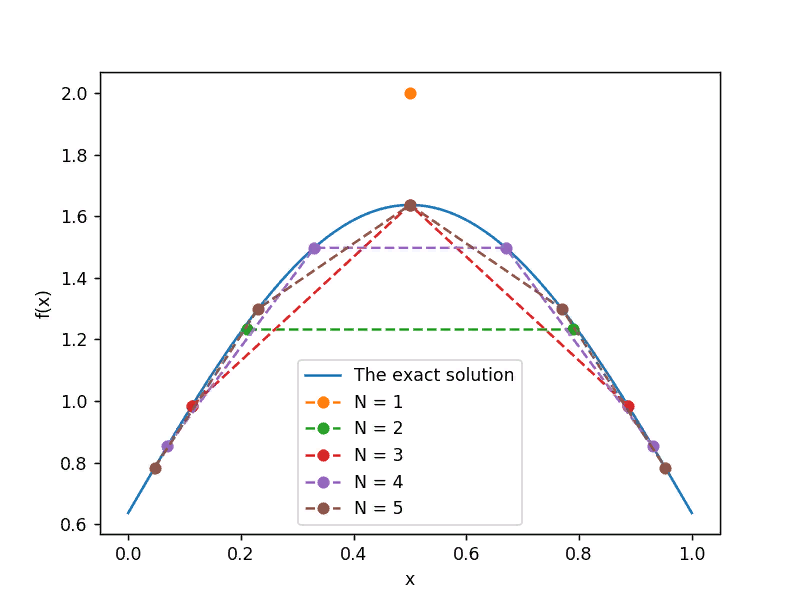

In [322]:
plt.figure()
x100 = np.linspace(0, 1, 100)
plt.plot(x100, func(x100), label='The exact solution')

for n in range(1, 6):
    
    x, w = roots_sh_legendre(n)
    f = np.linalg.solve(A(n,x), g(x))
    
    plt.plot(x, f, "o--", label='N = %1.0f'%n)
    plt.xlabel("x")
    plt.ylabel("f(x)")
    plt.legend()

In [323]:
n = 1

while 0 == 0:
    
    x, w = roots_sh_legendre(n)
    f = np.linalg.solve(A(n,x), g(x))
    error = np.linalg.norm(func(x) - f)
    print("The degree:", n, "  the error:", error)
    if  error < 1e-15: #при 1e-16 зацикливается
        break
    n +=1
    
print("\nThe optimal number of nodes:", n)

The degree: 1   the error: 0.3633802276324185
The degree: 2   the error: 0.02889134205974216
The degree: 3   the error: 0.0007657482051929123
The degree: 4   the error: 1.004047565394961e-05
The degree: 5   the error: 7.849635643883314e-08
The degree: 6   the error: 4.075690888101765e-10
The degree: 7   the error: 1.5066630835619936e-12
The degree: 8   the error: 2.6967223568632722e-15
The degree: 9   the error: 3.6821932062951477e-16

The optimal number of nodes: 9


<IPython.core.display.Javascript object>


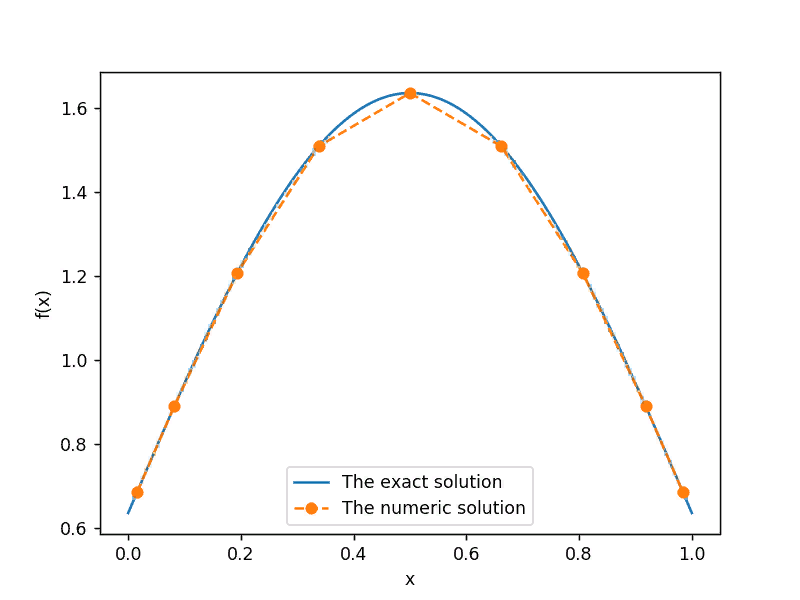

In [324]:
plt.figure()
plt.plot(x100, func(x100), label='The exact solution')
plt.plot(x, f, "o--", label='The numeric solution')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

### Task 2.2
(20% of the grade)

An obvious issue with the privious result for $f(x)$ that it returns the solution on a fixed set of points. We do not control precise positions of these points.

1. First, let's try to interpolate the values obtained in the previous task to a uniform grid of length 50. You may use any interpolation method. Compare the interpolation values with exact solution values.

In [325]:
from scipy.interpolate import CubicSpline

<IPython.core.display.Javascript object>


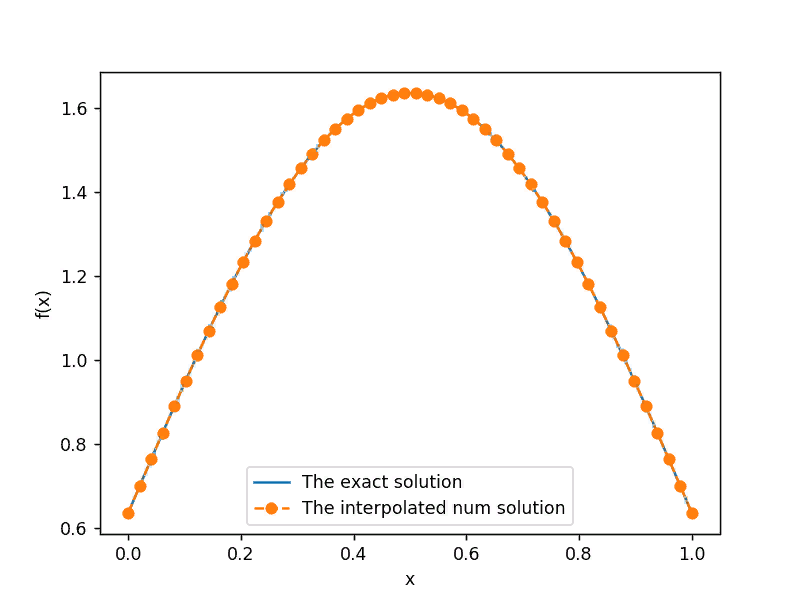

In [326]:
x50 = np.linspace(0, 1, 50)
cs = CubicSpline(x, f)

plt.figure()
plt.plot(x50, func(x50), label='The exact solution')
plt.plot(x50, cs(x50), "o--", label='The interpolated num solution')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

На первый взгляд кажется, что всё хорошо, но мы знаем, должны быть расхождения. Взглянем на норму:

In [327]:
np.linalg.norm(func(x50) - cs(x50))

0.0005375645619811903

2. Now use the following formula to calculate the function at points of the same uniform grid.
$$
f(x) = g(x) + \lambda \sum_j^N w_j\, K(x, t_j)\, f(t_j)
$$
Again, compare the interpolation values with the exact solution values, and also with the direct interpolation method.

<IPython.core.display.Javascript object>


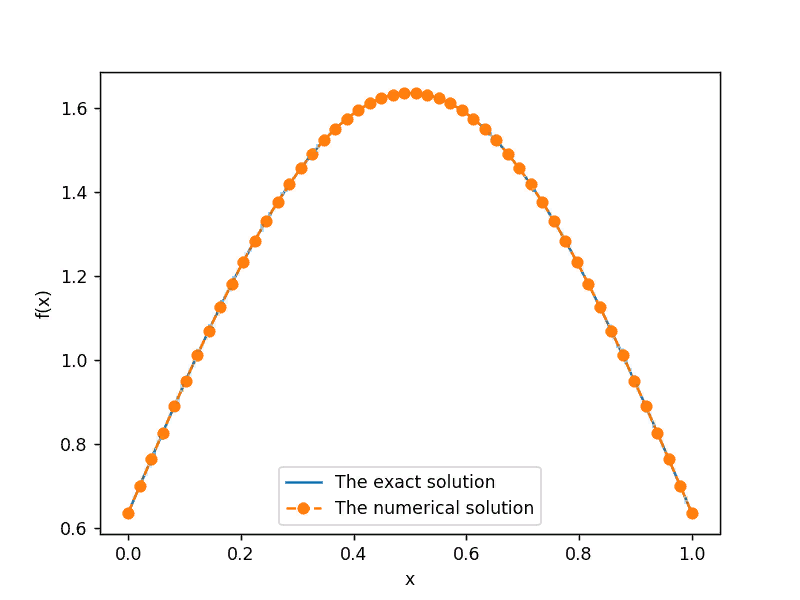

In [328]:
F = lambda x: g(x) + 0.5 * w @ f

plt.figure()
plt.plot(x50, func(x50), label='The exact solution')
plt.plot(x50, F(x50), "o--", label='The numerical solution')
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()

In [329]:
print("The error:", np.linalg.norm(func(x50) - F(x50)))

The error: 0.0


С помощью данной формулы исходная функция точно восстанавливается. Следовательно, разумно использовать её, а не интерполяцию.